In [1]:
import pandas as pd

train = pd.read_csv("../data/raw/amharic_sentiment_train.csv")
test = pd.read_csv("../data/raw/amharic_sentiment_test.csv")

print(train.head())
# Expected columns: ['tweet_id', 'text', 'label']


                                         clean_tweet  label
0  አሜን እውነት ብለሀል መሪዬ ዶር ዐብይ ብዙዎች ከአንተጋር መሆናችንን እን...      1
1  እወድሽ ነበረ ዛሬስ ጠላሁሽ\n እንደ ሰፌድ ቆሎ ያም ያም ዘገነሽ፧\nወይ ጉድ      0
2      😂😆😜🤡 አጋር ፓርቲም ሆኖ የመኖር ፍላጎት አሳይታለች....አሮጊቷ 🙌🏽🤣      0
3  ከፍተኛ ሊግ ለ | መከላከያ እና ሀምበሪቾ ወደ ሠንጠረዡ አናት ሲጠጉ ሶዶ...      1
4                   ይሄ ሽማግሌ ግን አይበቃውም? ንስሃ አይገባም🤦‍♂️      0


In [2]:
import sys
import os

# Add the parent directory to sys.path so 'utils' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.preprocessing import clean_amharic_text

# Load and clean the train and test CSV files
train_clean = clean_amharic_text("../data/processed/amharic_sentiment_train.csv")
test_clean = clean_amharic_text("../data/processed/amharic_sentiment_test.csv")

In [7]:
# 01_data_cleaning.ipynb

# --- 1. Imports ---
%pip install matplotlib seaborn wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import sys

# --- 2. Add src/ to system path for import ---
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.preprocessing import clean_amharic_text

# --- 3. Load Dataset ---
df = pd.read_csv("../data/raw/amharic_sentiment_train.csv")  # Adjust path/file if needed
df.head()



Note: you may need to restart the kernel to use updated packages.


,clean_tweet,label
0,አሜን እውነት ብለሀል መሪዬ ዶር ዐብይ ብዙዎች ከአንተጋር መሆናችንን እን...,1
1,እወድሽ ነበረ ዛሬስ ጠላሁሽ\n እንደ ሰፌድ ቆሎ ያም ያም ዘገነሽ፧\nወይ ጉድ,0
2,😂😆😜🤡 አጋር ፓርቲም ሆኖ የመኖር ፍላጎት አሳይታለች....አሮጊቷ 🙌🏽🤣,0
3,ከፍተኛ ሊግ ለ | መከላከያ እና ሀምበሪቾ ወደ ሠንጠረዡ አናት ሲጠጉ ሶዶ...,1
4,ይሄ ሽማግሌ ግን አይበቃውም? ንስሃ አይገባም🤦‍♂️,0


In [9]:
# --- 4. Basic Info ---
print("Dataset Info:")
df.info()

print("\nClass Distribution:")
print(df["clean_tweet"].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clean_tweet  2223 non-null   object
 1   label        2223 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB

Class Distribution:
clean_tweet
ALARMING NEWS ታዋቂው ፊዚከር ፕሮፌሰር ክራውስ  ደቡብ አፍሪካዊ ቡሽሪም ይሁን ካሜሮናዊው ሃበሻ ሚስት ያለው  ነብይ  ባይ ነኝ  ሁለቱም ሌባ ናቸው ይላሉ                                                           2
😅 የሌባ ደረቅ                                                                                                                                                        2
ኣሜን 🙏                                                                                                                                                            2
አንተ ምን አለብህ ? ጠባቂ መንግስት የሌላቸው ሺዎች ግን በየቀኑ እየሞቱ ነው                                                                                              

In [12]:
# --- 5. Add Cleaned Column ---
df["cleaned_tweet"] = df["clean_tweet"].fillna("").apply(clean_amharic_text)
df[["cleaned_tweet", "label"]].head()


,cleaned_tweet,label
0,አሜን እውነት ብለሀል መሪዬ ዶር አብይ ብዙዎች ከአንተጋር መሆናችንን እን...,1
1,እወድሽ ነበረ ዛሬስ ጠላሁሽ ሰፌድ ቆሎ ያም ያም ዘገነሽ ወይ ጉድ,0
2,🤡 አጋር ፓርቲም ሆኖ የመኖር ፍላጎት አሳይታለችአሮጊቷ 🤣,0
3,ከፍተኛ ሊግ ለ መከላከያ ሀምበሪቾ ወደ ሰንጠረዡ አናት ሲጠጉ ሶዶ ጨንቻ ...,1
4,ይሄ ሽማግሌ ግን አይበቃውም ንስሀ አይገባም🤦‍♂️,0


/var/folders/7t/c5_w5s0j5vd0kmvlz4qfwcv40000gn/T/ipykernel_28910/568117054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


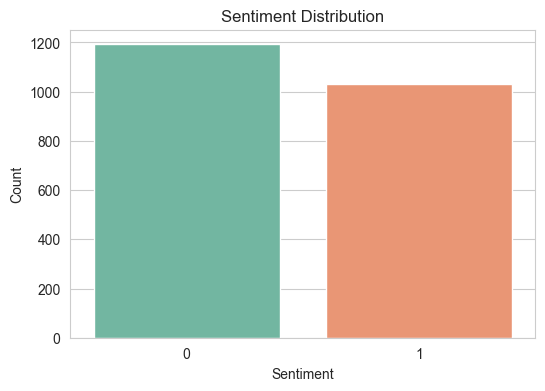

In [14]:
# --- 6. Visualize Sentiment Distribution ---
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


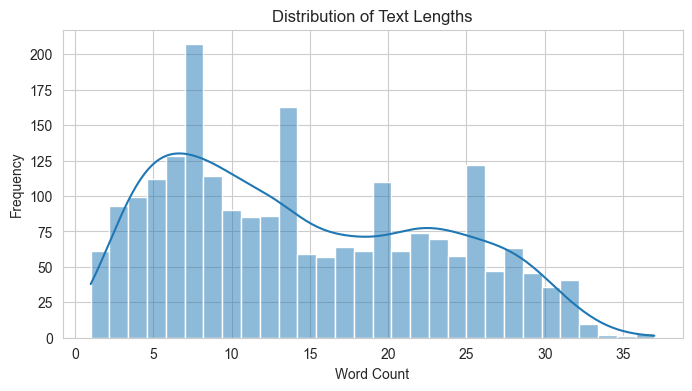

In [16]:
# --- 7. Text Length Analysis ---
df["text_length"] = df["cleaned_tweet"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


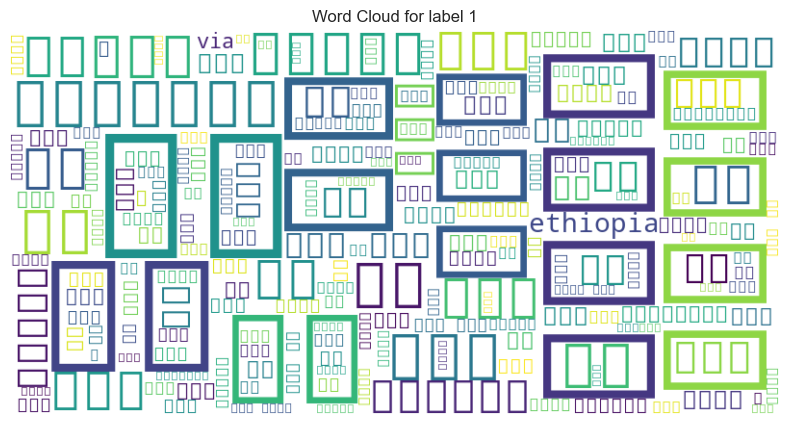

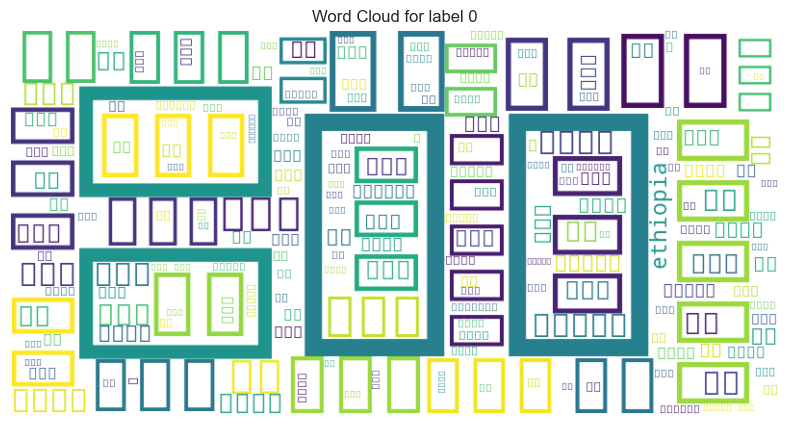

In [18]:
# --- 8. Word Clouds (Optional) ---
def show_wordcloud(label):
    text = " ".join(df[df["label"] == label]["cleaned_tweet"].dropna())
    wc = WordCloud(background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for label {label}")
    plt.show()

for label in df["label"].unique():
    show_wordcloud(label)


In [20]:
# --- 9. Save Cleaned Dataset ---
import os

output_path = "../data/processed/amharic_sentiment_cleaned.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df[["cleaned_tweet", "label"]].to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")


Cleaned data saved to ../data/processed/amharic_sentiment_cleaned.csv
